In [1]:
# manually upload zipa_output.csv and dict_output.csv
import pandas as pd

df_zipa = pd.read_csv("zipa_output.csv")
df_dict = pd.read_csv("dict_output.csv")

# print("Dictionary:")
# display(df_dict.head())

# print("ZIPA:")
# display(df_zipa.head())

# merge on audio_file
df = df_dict.merge(df_zipa, on="audio_file")
df


,audio_file,sentence_id,sentence,ipa_dict,ipa_dict_phones,ipa_dict_words,ipa_zipa,ipa_zipa_phones
0,common_voice_it_17630394.mp3,non_mainstream_s01,Successivamente è ammesso effettuare una bracc...,sutʃtʃessivamenteammessoeffettwareunabratʃtʃat...,s u tʃ tʃ e s s i v a m e n t e a m m e s s o ...,sutʃtʃessivamente ammesso effettware una bratʃ...,suttʃessivamenteamessoeffettwareunaabbrattʃata...,s u t tʃ e s s i v a m e n t e a m e s s o e f...
1,common_voice_it_18890792.mp3,non_mainstream_s02,Parlatemi di coloro che abitano il palazzo.,parlatemidikolorokeabitanoilpalatstso,p a r l a t e m i d i k o l o r o k e a b i t ...,parlatemi di koloro ke abitano il palatstso,parlatemidikoloroveabitanoilpalattso,p a r l a t e m i d i k o l o r o v e a b i t ...
2,common_voice_it_19933143.mp3,non_mainstream_s03,Il titolo della striscia non è cambiato ma il ...,iltitolodellastriʃʃanonkambjatomailpersonadʒdʒ...,i l t i t o l o d e l l a s t r i ʃ ʃ a n o n ...,il titolo della striʃʃa non kambjato ma il per...,iltitolodɛllastriʃʃanonɛkambjatomailpersonaddʒ...,i l t i t o l o d ɛ l l a s t r i ʃ ʃ a n o n ...
3,common_voice_it_20284001.mp3,non_mainstream_s04,Bob e il suo collega lo scoprono e iniziano a ...,eilsuokollɛɡaloskopronoeinitstsjanoapreokkuparsi,e i l s u o k o l l ɛ ɡ a l o s k o p r o n o ...,e il suo kollɛɡa lo skoprono e initstsjano a p...,bɔbɛilsuokollɛgaloskɔpronoɛinittsjanoapreokkup...,b ɔ b ɛ i l s u o k o l l ɛ g a l o s k ɔ p r ...
4,common_voice_it_20284279.mp3,non_mainstream_s05,Entrambi i suoi genitori sono Ebrei.,entrambiswɔidʒenitorisonoebrɛi,e n t r a m b i s w ɔ i dʒ e n i t o r i s o n...,entrambi swɔi dʒenitori sono ebrɛi,entrambejswɔjdʒenitorisɔnoɛbrɛji,e n t r a m b e j s w ɔ j dʒ e n i t o r i s ɔ...
5,common_voice_it_25595019.mp3,mainstream_s01,Ha una massa di circa quattro volte quella ter...,aunamassaditʃirkakwattrovɔltekwellaterrɛstre,a u n a m a s s a d i tʃ i r k a k w a t t r o...,a una massa di tʃirka kwattro vɔlte kwella ter...,aunamassaditʃirkakwattrovɔltekwellaterrɛstre,a u n a m a s s a d i tʃ i r k a k w a t t r o...
6,common_voice_it_25595088.mp3,mainstream_s02,Alberto Manzi vuole fare il maestro all'età di...,albɛrtomandzivwɔlefareilmaɛstrodiventianniinpj...,a l b ɛ r t o m a n dz i v w ɔ l e f a r e i l...,albɛrto mandzi vwɔle fare il maɛstro di venti ...,albɛrtomandsivɔlefareilmaɛstroalestadivɛntiann...,a l b ɛ r t o m a n d s i v ɔ l e f a r e i l ...
7,common_voice_it_25595133.mp3,mainstream_s03,Il commercio è favorito dalla posizione centra...,ilkommɛrtʃofavoritodallapositstsjonetʃentraled...,i l k o m m ɛ r tʃ o f a v o r i t o d a l l a...,il kommɛrtʃo favorito dalla positstsjone tʃent...,ilkommɛrtʃoɛfavoritodalappozittsjonetʃentraled...,i l k o m m ɛ r tʃ o ɛ f a v o r i t o d a l a...
8,common_voice_it_30609221.mp3,mainstream_s04,Molti ebrei di Berlino tentarono di nascondersi.,moltiebrɛidiberlinotentaronodinaskondersi,m o l t i e b r ɛ i d i b e r l i n o t e n t ...,molti ebrɛi di berlino tentarono di naskondersi,moltiɛbrɛjdiberlinotentaronodinaskondersi,m o l t i ɛ b r ɛ j d i b e r l i n o t e n t ...
9,common_voice_it_32187952.mp3,non_mainstream_s06,Una seconda chiesa si trova a Castelvecchio Ba...,unasekondakjɛsasitrɔvaabassoeddedikataasandʒus...,u n a s e k o n d a k j ɛ s a s i t r ɔ v a a ...,una sekonda kjɛsa si trɔva a basso ed dedikata...,unasekondakɛzasitrovaakastɛlvɛkkjobassoedɛdedi...,u n a s e k o n d a k ɛ z a s i t r o v a a k ...


In [2]:
import math

def levenshtein_seq(ref, hyp):
    m, n = len(ref), len(hyp)
    dp = [[0]*(n+1) for _ in range(m+1)]
    for i in range(m+1):
        dp[i][0] = i
    for j in range(n+1):
        dp[0][j] = j
    for i in range(1, m+1):
        for j in range(1, n+1):
            cost = 0 if ref[i-1] == hyp[j-1] else 1
            dp[i][j] = min(
                dp[i-1][j] + 1,
                dp[i][j-1] + 1,
                dp[i-1][j-1] + cost,
            )
    return dp[m][n]

def per_generic(ref_str, hyp_str, to_seq):
    """
    Generic PER:
    - ref_str, hyp_str: strings
    - to_seq: function that turns a string into a sequence (list) for Levenshtein
    """
    if not isinstance(ref_str, str) or ref_str.strip() == "":
        return math.nan

    ref = to_seq(ref_str)
    hyp = [] if not isinstance(hyp_str, str) else to_seq(hyp_str)

    if len(ref) == 0:
        return math.nan

    dist = levenshtein_seq(ref, hyp)
    return dist / len(ref)

In [3]:
# 1) PER on phone tokens (space-separated)
df["per_phone"] = df.apply(
    lambda row: per_generic(
        row["ipa_dict_phones"],
        row["ipa_zipa_phones"],
        to_seq=lambda s: s.split()
    ),
    axis=1
)

# 2) PER on raw IPA strings (character-by-character)
df["per_sentence_ipa"] = df.apply(
    lambda row: per_generic(
        row["ipa_dict"],
        row["ipa_zipa"],
        to_seq=list  # turns string into list of chars
    ),
    axis=1
)

df

,audio_file,sentence_id,sentence,ipa_dict,ipa_dict_phones,ipa_dict_words,ipa_zipa,ipa_zipa_phones,per_phone,per_sentence_ipa
0,common_voice_it_17630394.mp3,non_mainstream_s01,Successivamente è ammesso effettuare una bracc...,sutʃtʃessivamenteammessoeffettwareunabratʃtʃat...,s u tʃ tʃ e s s i v a m e n t e a m m e s s o ...,sutʃtʃessivamente ammesso effettware una bratʃ...,suttʃessivamenteamessoeffettwareunaabbrattʃata...,s u t tʃ e s s i v a m e n t e a m e s s o e f...,0.125000,0.115385
1,common_voice_it_18890792.mp3,non_mainstream_s02,Parlatemi di coloro che abitano il palazzo.,parlatemidikolorokeabitanoilpalatstso,p a r l a t e m i d i k o l o r o k e a b i t ...,parlatemi di koloro ke abitano il palatstso,parlatemidikoloroveabitanoilpalattso,p a r l a t e m i d i k o l o r o v e a b i t ...,0.057143,0.054054
2,common_voice_it_19933143.mp3,non_mainstream_s03,Il titolo della striscia non è cambiato ma il ...,iltitolodellastriʃʃanonkambjatomailpersonadʒdʒ...,i l t i t o l o d e l l a s t r i ʃ ʃ a n o n ...,il titolo della striʃʃa non kambjato ma il per...,iltitolodɛllastriʃʃanonɛkambjatomailpersonaddʒ...,i l t i t o l o d ɛ l l a s t r i ʃ ʃ a n o n ...,0.142857,0.138462
3,common_voice_it_20284001.mp3,non_mainstream_s04,Bob e il suo collega lo scoprono e iniziano a ...,eilsuokollɛɡaloskopronoeinitstsjanoapreokkuparsi,e i l s u o k o l l ɛ ɡ a l o s k o p r o n o ...,e il suo kollɛɡa lo skoprono e initstsjano a p...,bɔbɛilsuokollɛgaloskɔpronoɛinittsjanoapreokkup...,b ɔ b ɛ i l s u o k o l l ɛ g a l o s k ɔ p r ...,0.173913,0.166667
4,common_voice_it_20284279.mp3,non_mainstream_s05,Entrambi i suoi genitori sono Ebrei.,entrambiswɔidʒenitorisonoebrɛi,e n t r a m b i s w ɔ i dʒ e n i t o r i s o n...,entrambi swɔi dʒenitori sono ebrɛi,entrambejswɔjdʒenitorisɔnoɛbrɛji,e n t r a m b e j s w ɔ j dʒ e n i t o r i s ɔ...,0.206897,0.200000
5,common_voice_it_25595019.mp3,mainstream_s01,Ha una massa di circa quattro volte quella ter...,aunamassaditʃirkakwattrovɔltekwellaterrɛstre,a u n a m a s s a d i tʃ i r k a k w a t t r o...,a una massa di tʃirka kwattro vɔlte kwella ter...,aunamassaditʃirkakwattrovɔltekwellaterrɛstre,a u n a m a s s a d i tʃ i r k a k w a t t r o...,0.000000,0.000000
6,common_voice_it_25595088.mp3,mainstream_s02,Alberto Manzi vuole fare il maestro all'età di...,albɛrtomandzivwɔlefareilmaɛstrodiventianniinpj...,a l b ɛ r t o m a n dz i v w ɔ l e f a r e i l...,albɛrto mandzi vwɔle fare il maɛstro di venti ...,albɛrtomandsivɔlefareilmaɛstroalestadivɛntiann...,a l b ɛ r t o m a n d s i v ɔ l e f a r e i l ...,0.206897,0.186441
7,common_voice_it_25595133.mp3,mainstream_s03,Il commercio è favorito dalla posizione centra...,ilkommɛrtʃofavoritodallapositstsjonetʃentraled...,i l k o m m ɛ r tʃ o f a v o r i t o d a l l a...,il kommɛrtʃo favorito dalla positstsjone tʃent...,ilkommɛrtʃoɛfavoritodalappozittsjonetʃentraled...,i l k o m m ɛ r tʃ o ɛ f a v o r i t o d a l a...,0.117647,0.109091
8,common_voice_it_30609221.mp3,mainstream_s04,Molti ebrei di Berlino tentarono di nascondersi.,moltiebrɛidiberlinotentaronodinaskondersi,m o l t i e b r ɛ i d i b e r l i n o t e n t ...,molti ebrɛi di berlino tentarono di naskondersi,moltiɛbrɛjdiberlinotentaronodinaskondersi,m o l t i ɛ b r ɛ j d i b e r l i n o t e n t ...,0.048780,0.048780
9,common_voice_it_32187952.mp3,non_mainstream_s06,Una seconda chiesa si trova a Castelvecchio Ba...,unasekondakjɛsasitrɔvaabassoeddedikataasandʒus...,u n a s e k o n d a k j ɛ s a s i t r ɔ v a a ...,una sekonda kjɛsa si trɔva a basso ed dedikata...,unasekondakɛzasitrovaakastɛlvɛkkjobassoedɛdedi...,u n a s e k o n d a k ɛ z a s i t r o v a a k ...,0.367347,0.360000


In [4]:
# save results
df.to_csv("comparison_results.csv", index=False)

"comparison_results.csv saved"

'comparison_results.csv saved'

In [5]:
def get_dialect(sentence_id: str) -> str:
    # split from the right, remove the last bit (e.g. "s01")
    parts = sentence_id.split("_")
    # everything except the last part is the dialect
    return "_".join(parts[:-1])

df["dialect"] = df["sentence_id"].apply(get_dialect)
df[["sentence_id", "dialect"]]

per_summary = df.groupby("dialect")[["per_phone", "per_sentence_ipa"]].mean()
per_summary

,per_phone,per_sentence_ipa
dialect,,
mainstream,0.097101,0.093865
non_mainstream,0.182125,0.176318


In [6]:
def get_sent_num(sentence_id: str) -> int:
    # e.g. "mainstream_s01" -> "s01" -> 1
    last_part = sentence_id.split("_")[-1]  # "s01"
    return int(last_part[1:])               # drop the "s", keep "01"

df["sent_num"] = df["sentence_id"].apply(get_sent_num)
# df[["sentence_id", "sent_num"]]

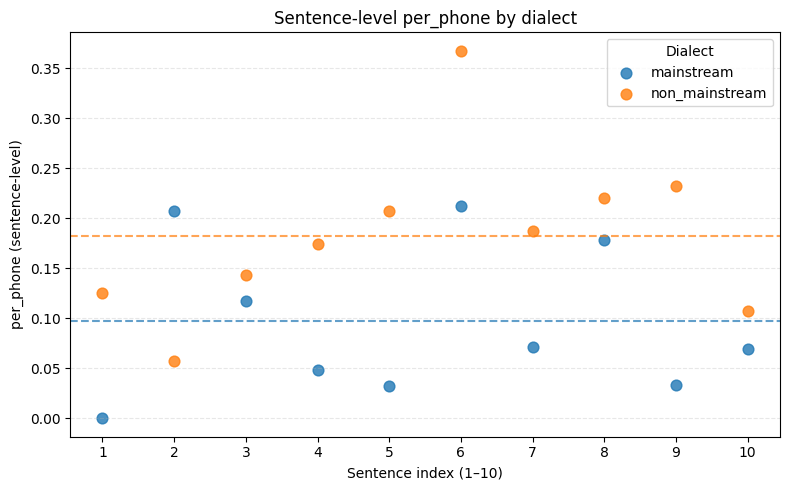

In [7]:
import matplotlib.pyplot as plt

# choose which PER to plot: "per_phone" or "per_sentence_ipa"
y_col = "per_phone"

# colours by dialect
colors = {"mainstream": "tab:blue", "non_mainstream": "tab:orange"}

plt.figure(figsize=(8, 5))

for dialect, group in df.groupby("dialect"):
    plt.scatter(
        group["sent_num"],
        group[y_col],
        label=dialect,
        alpha=0.8,
        s=60,
        c=colors.get(dialect, "gray"),
    )

# compute means
means = df.groupby("dialect")[y_col].mean()

# add mean lines
for dialect, mean_value in means.items():
    plt.axhline(
        y=mean_value,
        color=colors[dialect],
        linestyle="--",
        alpha=0.7
    )

plt.xlabel("Sentence index (1–10)")
plt.ylabel(f"{y_col} (sentence-level)")
plt.title(f"Sentence-level {y_col} by dialect")
plt.xticks(range(1, 11))
plt.legend(title="Dialect")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

# save the image
plt.savefig("per_phone_scatter.png", dpi=300)

plt.show()